In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
%matplotlib inline 
import warnings
warnings.simplefilter(action = 'ignore', category=Warning)

In [5]:
df = pd.read_csv(r'C:\Users\Samir\Documents\ML\DataSets\calendar.csv')
df.drop('adjusted_price',axis=1, inplace=True)

In [6]:
df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,6606,2024-06-24,f,$90.00,30.0,1125.0
1,6606,2024-06-25,f,$90.00,30.0,1125.0
2,6606,2024-06-26,f,$90.00,30.0,1125.0
3,6606,2024-06-27,f,$90.00,30.0,1125.0
4,6606,2024-06-28,f,$90.00,30.0,1125.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350878 entries, 0 to 2350877
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   minimum_nights  float64
 5   maximum_nights  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.6+ MB


In [8]:
df.date.value_counts(ascending=False)

date
2024-12-24    6442
2025-02-05    6442
2025-02-13    6442
2025-02-12    6442
2025-02-11    6442
              ... 
2025-06-01    6423
2025-06-23    6423
2025-06-22    6423
2024-06-24    3821
2025-06-24    2606
Name: count, Length: 366, dtype: int64

In [9]:
df.available.value_counts()

available
t    1182088
f    1168790
Name: count, dtype: int64

In [10]:
#What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [11]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [12]:
df['year'].value_counts()

year
2024    1227801
2025    1123077
Name: count, dtype: int64

In [13]:
df['available'] = df['available'].map({'t':1,'f':0})

**July is the bussiest month**

In [15]:
X = df.groupby('month')['available'].mean().sort_values()
X[:5]

month
7    0.304679
6    0.334716
5    0.388274
4    0.401806
8    0.480761
Name: available, dtype: float64

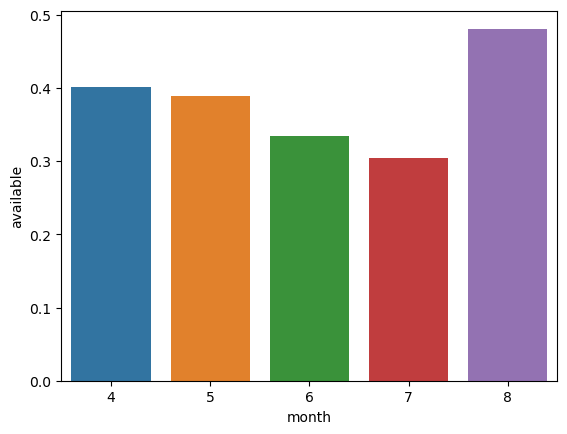

In [16]:
sns.barplot(X[:5], palette='tab10')

plt.show()

In [17]:
df['price'].unique()

array(['$90.00', '$600.00', '$129.00', '$81.00', '$300.00', '$115.00',
       '$78.00', '$100.00', '$125.00', '$42.00', '$165.00', '$50.00',
       '$69.00', '$106.00', '$99.00', '$65.00', '$145.00', '$89.00',
       '$179.00', '$485.00', '$119.00', '$93.00', '$105.00', '$60.00',
       '$285.00', '$173.00', '$215.00', '$240.00', '$230.00', '$118.00',
       '$135.00', '$112.00', '$110.00', '$98.00', '$35.00', '$70.00',
       '$85.00', '$95.00', '$138.00', '$150.00', '$88.00', '$75.00',
       '$56.00', '$131.00', '$87.00', '$45.00', '$172.00', '$255.00',
       '$40.00', '$46.00', '$175.00', '$120.00', '$155.00', '$130.00',
       '$52.00', '$154.00', '$275.00', '$84.00', '$64.00', '$226.00',
       '$57.00', '$251.00', '$166.00', '$169.00', '$80.00', '$185.00',
       '$320.00', '$124.00', '$225.00', '$565.00', '$142.00', '$68.00',
       '$900.00', '$199.00', '$557.00', '$295.00', '$180.00', '$55.00',
       '$350.00', '$160.00', '$500.00', '$103.00', '$109.00', '$290.00',
       '

In [18]:
df['price'] = df['price'].replace({'\$':'',',':''},regex=True)
df['price'] = df['price'].astype(float).astype(int)

In [19]:
df['price'].unique()[:5]

array([ 90, 600, 129,  81, 300])

In [20]:
df['price'].describe().T

count    2.350878e+06
mean     2.674292e+02
std      4.622830e+02
min      0.000000e+00
25%      1.000000e+02
50%      1.550000e+02
75%      2.780000e+02
max      1.200000e+04
Name: price, dtype: float64

In [21]:
df.groupby('month')['price'].mean()

month
1     267.474076
2     267.474076
3     267.474076
4     267.474076
5     267.474076
6     266.927041
7     267.474076
8     267.474076
9     267.474076
10    267.474076
11    267.474076
12    267.474076
Name: price, dtype: float64

**trends of new visitors**

In [23]:
df['is_new_visitor'] = df['listing_id'].duplicated(keep='first')

df['is_new_visitor'] = ~df['is_new_visitor']

In [24]:
df_new_visitor = df[df['is_new_visitor']]

In [25]:
df_new_visitor.groupby('month')['available'].mean()

month
6    0.145607
Name: available, dtype: float64

In [26]:
df_new_visitor['month'].unique()

array([6])